In [ ]:
import tensorflow as tf
from tensorflow import keras as keras
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x1=np.load('/content/drive/MyDrive/DataSets/Topo_Symm_Compounds_Normal_Nov23.npy')
x2=np.load('/content/drive/MyDrive/DataSets/Topo_Symm_Compounds_Swapped_Nov23.npy')
x3=np.load('/content/drive/MyDrive/DataSets/Topo_Vortex_Compounds_Normal_Nov23.npy')
x4=np.load('/content/drive/MyDrive/DataSets/Topo_Vortex_Compounds_Swapped_Nov23.npy')
y1=np.load('/content/drive/MyDrive/DataSets/Topo_Classifier_Output_Symm.npy')
y2=np.load('/content/drive/MyDrive/DataSets/Topo_Classifier_Output_Vortex.npy')
print(np.shape(x1))
print(np.shape(x2))
print(np.shape(x3))
print(np.shape(x4))
print(np.shape(y1))
print(np.shape(y2))

(187, 80, 512)
(187, 80, 512)
(294, 80, 512)
(294, 80, 512)
(187,)
(294,)


In [ ]:
y=np.concatenate((y1,y2,y1,y2))
x=np.concatenate((x1,x3,x2, x4))
x=(x+1)/2
print(np.shape(x))
print(np.shape(y))

(962, 80, 512)
(962,)


In [ ]:
def make_bin(yy):
  if yy==0:
    vec=1.0
  if yy==1:
    vec=0.0
  if yy==2:
    vec=0.0
  return vec
def vecty(yy):
  if yy==0:
    vec=[1,0,0]
  if yy==1:
    vec=[0,1,0]
  if yy==2:
    vec=[0,0,1]
  return vec



In [ ]:
import random
xr=[]
yr=[]
lst=random.sample(range(int(962)), int(962))

for j in lst:
  yr.append(vecty(y[j]))
  xr.append(x[j])
#xr=np.array(xr)
#yr=n.array(yr)

In [ ]:
ns=962
print(ns)

x_train=xr[:int(.8*ns)]
x_test=xr[int(.8*ns):int(.9*ns)]
x_val=xr[int(.9*ns):]
y_train=yr[:int(.8*ns)]
y_test=yr[int(.8*ns):int(.9*ns)]
y_val=yr[int(.9*ns):]

962


In [ ]:
x_train=np.array(x_train).reshape(int(.8*ns),160,256)
x_test=np.array(x_test).reshape(int(.1*ns),160,256)
x_val=np.array(x_val).reshape(97,160,256)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
import keras.backend as K

def custom_loss2(y_true, y_pred):
  #y_true = tf.cast(y_true, tf.float32)
  loss=K.abs(K.sum(K.abs(K.round(K.abs(y_true))-tf.cast(K.round(K.abs(y_pred)),tf.float32))))
  return loss

In [ ]:
run=True
while run==True:
  import keras
  from keras import layers
  import keras.backend as K
  from keras.layers import LeakyReLU
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=120, restore_best_weights=True, start_from_epoch=20)
  input_img = keras.Input(shape=( 160, 256, 1))
  x = layers.Conv2D(4, 2, strides = (2,4),  padding='same')(input_img)
  x = LeakyReLU(alpha=0.2)(x)
  x = layers.Conv2D(32, 2,strides = (2,2),  padding='same')(x)
  x = LeakyReLU(alpha=0.2)(x)
  x = layers.Conv2D(32, 3, strides = (2,2), padding='same')(x)
  x = LeakyReLU(alpha=0.2)(x)
  x = layers.Flatten()(x)

  output= layers.Dense(1, activation='sigmoid')(x)

  crstldisc = keras.Model(input_img, output)
  crstldisc.compile(optimizer='adam', loss=K.binary_crossentropy, metrics=['accuracy'])
  history=crstldisc.fit(x_train, y_train,
                epochs=600,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, y_test), callbacks=[callback])
  if history.history['val_accuracy'][history.history['val_loss'].index(np.min(history.history['val_loss']))]>0.88:
    run=False

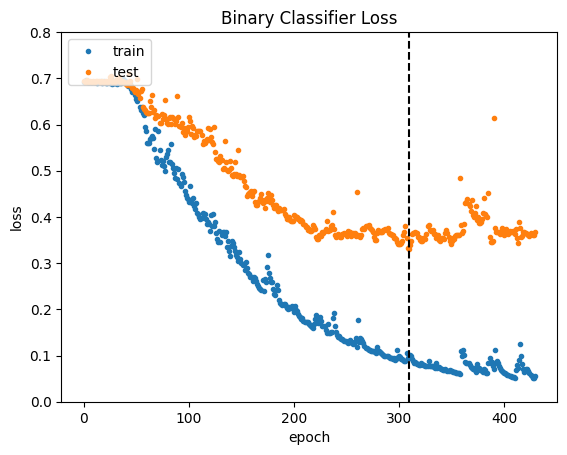

In [ ]:
import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = "Times New Roman"
#plt.rcParams.update({'font.size': 16})
plt.plot(history.history['loss'],'.')
plt.plot(history.history['val_loss'],'.')
plt.title('Binary Classifier Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot((429-120)*np.ones(20),np.linspace(0,1,20),'--',color='black')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0,.8)
#plt.savefig('/content/drive/MyDrive/Discriminators/Binary_Class_Loss_Jan24.png')
plt.show()

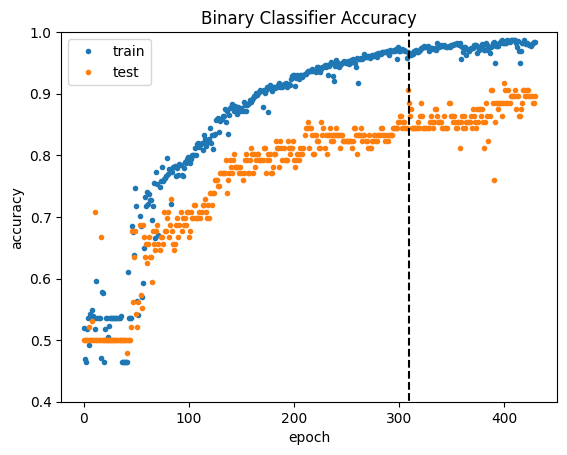

In [ ]:
import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = "Times New Roman"
#plt.rcParams.update({'font.size': 16})
plt.plot(history.history['accuracy'],'.')
plt.plot(history.history['val_accuracy'],'.')
plt.title('Binary Classifier Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot((429-120)*np.ones(20),np.linspace(0,1,20),'--',color='black')

plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0.4,1)
plt.savefig('/content/drive/MyDrive/Discriminators/Binary_Class_Acc_Jan24.png')

plt.show()

In [ ]:
run=True
while run==True:
  import keras
  from keras import layers
  import keras.backend as K
  from keras.layers import LeakyReLU
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=120, restore_best_weights=True, start_from_epoch=60)
  input_img = keras.Input(shape=( 160, 256, 1))
  x = layers.Conv2D(4, 2, strides = (2,4),  padding='same')(input_img)
  x = LeakyReLU(alpha=0.2)(x)
  x = layers.Conv2D(32, 2,strides = (2,2),  padding='same')(x)
  x = LeakyReLU(alpha=0.2)(x)
  x = layers.Conv2D(32, 3, strides = (2,2), padding='same')(x)
  x = LeakyReLU(alpha=0.2)(x)
  x = layers.Flatten()(x)
  output= layers.Dense(3, activation='softmax')(x)

  crstldisc = keras.Model(input_img, output)
  crstldisc.compile(optimizer='adam', loss=K.categorical_crossentropy, metrics=['CategoricalAccuracy','accuracy'])
  #crstldisc.summary()

  #output= layers.Dense(1, activation='sigmoid')(x)

  #crstldisc = keras.Model(input_img, output)
  #crstldisc.compile(optimizer='adam', loss=K.binary_crossentropy, metrics=['accuracy'])
  history=crstldisc.fit(x_train, y_train,
                epochs=600,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, y_test), callbacks=[callback])
  if history.history['val_accuracy'][history.history['val_loss'].index(np.min(history.history['val_loss']))]>0.85:
    run=False

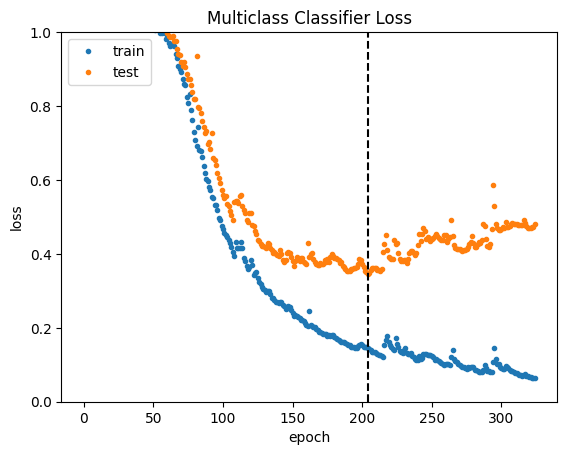

In [ ]:
import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = "Times New Roman"
#plt.rcParams.update({'font.size': 16})
plt.plot(history.history['loss'],'.')
plt.plot(history.history['val_loss'],'.')
plt.title('Multiclass Classifier Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.plot((324-120)*np.ones(20),np.linspace(0,1,20),'--',color='black')
plt.ylim(0,1)
plt.savefig('/content/drive/MyDrive/Discriminators/Multi_Class_Acc.png')
plt.show()

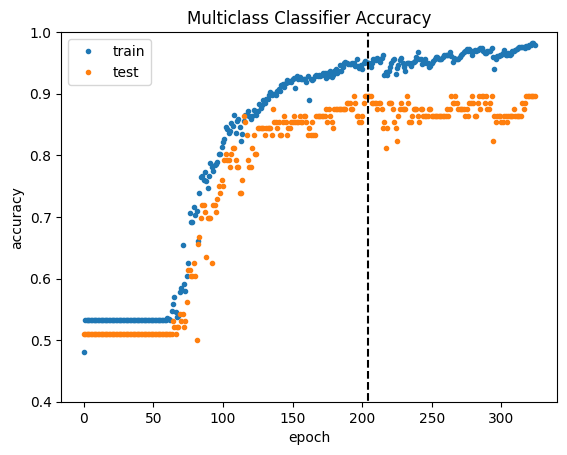

In [ ]:
import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = "Times New Roman"
#plt.rcParams.update({'font.size': 16})
plt.plot(history.history['accuracy'],'.')
plt.plot(history.history['val_accuracy'],'.')
plt.title('Multiclass Classifier Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.plot((324-120)*np.ones(20),np.linspace(0,1,20),'--',color='black')
plt.ylim(.4,1)
plt.savefig('/content/drive/MyDrive/Discriminators/Multi_Class_Acc.png')
plt.show()